### Importing libraries

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from PIL import Image
import os
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout

### reading images

In [2]:
data = []
labels = []
classes = 43
cur_path = os.getcwd()

#Retrieving the images and their labels 
for i in range(classes):
    path = os.path.join(cur_path,'train',str(i))
    images = os.listdir(path)

    for a in images:
        try:
            image = Image.open(path + '\\'+ a)
            image = image.resize((30,30))
            image = np.array(image)
            #sim = Image.fromarray(image)
            data.append(image)
            labels.append(i)
        except:
            print("Error loading image")

### splitting data

In [3]:
#Converting lists into numpy arrays
data = np.array(data)
labels = np.array(labels)

print(data.shape, labels.shape)
#Splitting training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

#Converting the labels into one hot encoding
y_train = to_categorical(y_train, 43)
y_test = to_categorical(y_test, 43)

(39209, 30, 30, 3) (39209,)
(31367, 30, 30, 3) (7842, 30, 30, 3) (31367,) (7842,)


### Building model

In [4]:
#Building the model
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=X_train.shape[1:]))
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(43, activation='softmax'))

#Compilation of the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

epochs = 15
history = model.fit(X_train, y_train, batch_size=32, epochs=epochs, validation_data=(X_test, y_test))

Epoch 1/15
981/981 [==============================] - 40s 40ms/step - loss: 1.9763 - accuracy: 0.4961 - val_loss: 0.4063 - val_accuracy: 0.8910
Epoch 2/15
981/981 [==============================] - 38s 39ms/step - loss: 0.5685 - accuracy: 0.8370 - val_loss: 0.2290 - val_accuracy: 0.9401
Epoch 3/15
981/981 [==============================] - 110s 112ms/step - loss: 0.3697 - accuracy: 0.8941 - val_loss: 0.1369 - val_accuracy: 0.9614
Epoch 4/15
981/981 [==============================] - 105s 107ms/step - loss: 0.3049 - accuracy: 0.9124 - val_loss: 0.1144 - val_accuracy: 0.9686
Epoch 5/15
981/981 [==============================] - 87s 89ms/step - loss: 0.2750 - accuracy: 0.9234 - val_loss: 0.0690 - val_accuracy: 0.9813
Epoch 6/15
981/981 [==============================] - 38s 38ms/step - loss: 0.2576 - accuracy: 0.9278 - val_loss: 0.1114 - val_accuracy: 0.9718
Epoch 7/15
981/981 [==============================] - 45s 46ms/step - loss: 0.2532 - accuracy: 0.9340 - val_loss: 0.0574 - val_accur

#### evaluating model

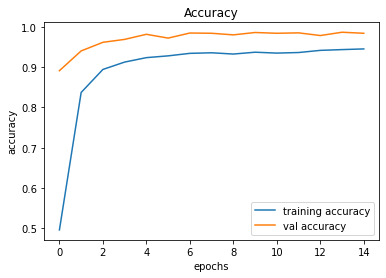

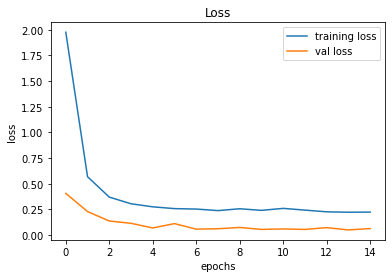

In [5]:
plt.figure(0)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

plt.figure(1)
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

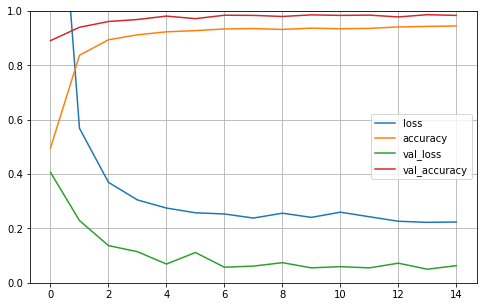

In [6]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()